One of the most important part for a machine learning project is when we have a dataset with a lot of features we need to select the  very important features and for this firstly we will do perform some feature selection techniques that are Univariate Feature Selection,  Recursive feature elimination and Recursive feature elimination with cross validation and with these selected features we will perform random forset classification.<br/>
<br/>
After that we will use the technique of feature extraction - Principle Component Analysis (PCA) and apply machine learning classification algorithm k nearest neighbor and Suppport vector machine classification.

# Breast Cancer Wisconsin Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information:

1-  ID number <br/>
2- Diagnosis (M = malignant, B = benign)
3-32) <br/>

Ten real-valued features are computed for each cell nucleus: <br/>


a) radius (mean of distances from center to points on the perimeter) <br/>
b) texture (standard deviation of gray-scale values) <br/>
c) perimeter <br/>
d) area <br/>
e) smoothness (local variation in radius lengths) <br/>
f) compactness (perimeter^2 / area - 1.0) <br/>
g) concavity (severity of concave portions of the contour) <br/>
h) concave points (number of concave portions of the contour) <br/>
i) symmetry <br/>
j) fractal dimension ("coastline approximation" - 1) <br/>

In [3]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [4]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

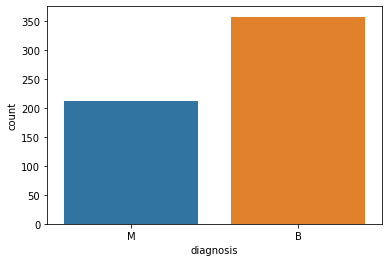

In [6]:
sns.countplot(df['diagnosis'])

Data is good meaning its not highly imbalanced.

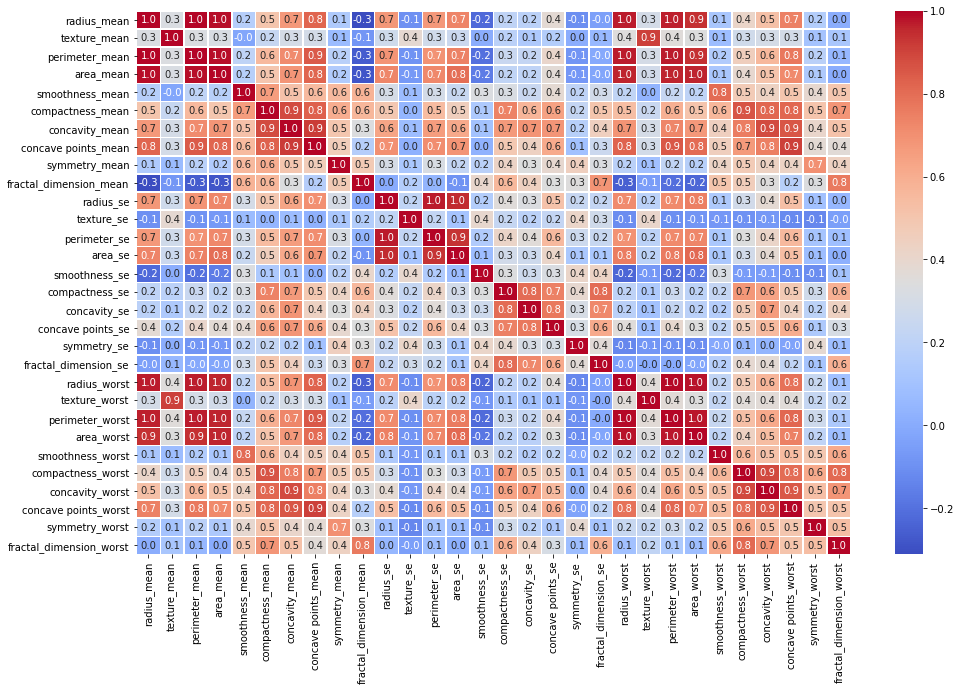

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linewidths=.5, fmt= '.1f')

In [8]:
X = df.iloc[: , 1:]
X[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = df['diagnosis'].values
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le_Y=LabelEncoder()
y=le_Y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

1 - M <br/>
0 - B

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


## Univariate Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 7 features
select_feature = SelectKBest(chi2, k=7).fit(X_train, y_train)

print('Score list:', select_feature.scores_)
print('')
print('Feature list:', X_train.columns)


Score list: [1.96462432e+02 6.01083354e+01 1.47789415e+03 4.04232576e+04
 1.18648693e-01 3.91682186e+00 1.39140572e+01 7.84044121e+00
 2.12197202e-01 1.74329001e-04 2.67141395e+01 1.13399000e-01
 1.87862217e+02 6.78341790e+03 3.91567532e-03 3.41776626e-01
 4.61249948e-01 1.77874954e-01 1.23023298e-03 2.27235663e-03
 3.68524841e+02 1.20148085e+02 2.73450336e+03 8.56672572e+04
 3.14467286e-01 1.41296236e+01 2.68924549e+01 1.00441471e+01
 1.06365081e+00 1.68258822e-01]

Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', '

In [13]:
X_train2 = select_feature.transform(X_train)
X_test2 = select_feature.transform(X_test)
print(X_train2.shape)
print(X_test2.shape)

(426, 7)
(143, 7)


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(X_train2, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred = rfc.predict(X_test2)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

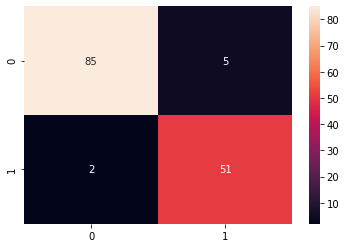

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [17]:
ac = accuracy_score(y_test,y_pred)
print(ac*100,"%")

95.1048951048951 %


In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train2, y = y_train, cv = 10)
print(accuracies)
print('')
print(accuracies.mean())
print('')
print(accuracies.std())

[0.97674419 0.93023256 0.93023256 0.95348837 0.88372093 0.95348837
 0.95238095 0.9047619  0.92857143 0.88095238]

0.9294573643410853

0.0299548332296093


### Recursive feature elimination 

In [19]:
#Random Forest Classifier With n_estimators = 50
rfc1 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy',random_state = 0)  

In [20]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rfc1, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [21]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [22]:
xtrain_rfe = rfe.transform(X_train)
xtest_rfe = rfe.transform(X_test)
print(xtrain_rfe.shape)
print(xtest_rfe.shape)

(426, 5)
(143, 5)


In [23]:
  rfc1.fit(xtrain_rfe,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [24]:
y_pred1 = rfc1.predict(xtest_rfe)
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

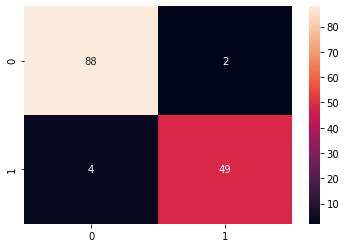

In [25]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1,annot=True,fmt="d")

In [26]:
ac1 = accuracy_score(y_test,y_pred1)
print(ac1*100,"%")

95.8041958041958 %


In [27]:
accuracies1 = cross_val_score(estimator = rfc1, X = xtrain_rfe, y = y_train, cv = 10)
print(accuracies1)
print('')
print(accuracies1.mean())
print('')
print(accuracies1.std())

[0.90697674 0.97674419 0.90697674 0.95348837 0.88372093 0.95348837
 0.97619048 0.92857143 0.95238095 0.95238095]

0.9390919158361019

0.029666655897959835


## Recursive feature elimination with cross validation 

In [28]:
rfc2 = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0) 

In [29]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=rfc2, step=1, cv=10,scoring='accuracy')   
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


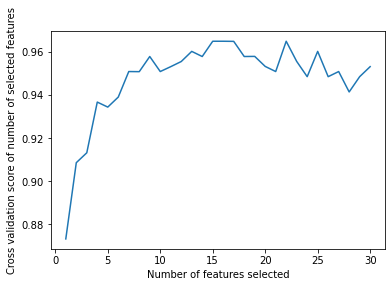

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
xtrain_rfecv = rfecv.transform(X_train)
xtest_rfecv = rfecv.transform(X_test)
print(xtrain_rfecv.shape)
print(xtest_rfecv.shape)

(426, 15)
(143, 15)


In [32]:
  rfc2.fit(xtrain_rfecv,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [33]:
pred = rfc2.predict(xtest_rfecv)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

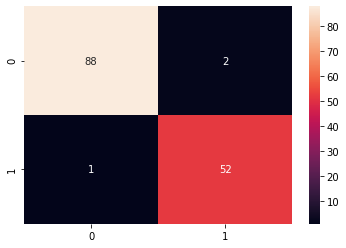

In [34]:
cm2 = confusion_matrix(y_test, pred)
sns.heatmap(cm2,annot=True,fmt="d")

In [35]:
ac2 = accuracy_score(y_test,pred)
print(ac2*100,"%")

97.9020979020979 %


In [36]:
accuracies2 = cross_val_score(estimator = rfc2, X = xtrain_rfecv, y = y_train, cv = 10)
print(accuracies2)
print('')
print(accuracies2.mean())
print('')
print(accuracies2.std())

[0.93023256 0.97674419 0.93023256 0.97674419 0.88372093 0.97674419
 0.97619048 0.92857143 1.         1.        ]

0.9579180509413068

0.03583063281046601


## APPLYING PCA

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [41]:
explained_variance

array([0.43315126, 0.19586506])

In [42]:
X_train

array([[-2.85924814e+00, -2.86144799e-01],
       [-3.26308367e+00,  1.07251955e+00],
       [ 3.75551268e+00, -3.40968876e+00],
       [-3.49263242e+00, -2.68784664e+00],
       [-7.43517447e-01, -2.48214924e+00],
       [-3.36556228e+00, -6.04103786e-01],
       [-3.18672558e+00, -1.88203437e+00],
       [-9.75800523e-01,  9.14900548e-01],
       [ 3.61845617e+00,  4.16797546e+00],
       [ 4.25896553e+00,  9.52260594e+00],
       [-8.00920047e-01,  7.76348214e-02],
       [-3.44711508e+00,  1.26773112e+00],
       [ 1.85939039e+00,  7.94595702e-01],
       [-2.12832960e+00, -1.18572536e+00],
       [-6.04598633e-01, -9.14935763e-01],
       [-3.93494805e+00, -2.07089658e+00],
       [ 4.18868101e+00,  9.28984343e-01],
       [ 4.93713709e+00, -1.15947338e+00],
       [-3.81508251e+00, -9.42143756e-01],
       [-2.49836390e-01,  2.30399084e+00],
       [ 2.51338427e+00, -1.32090995e+00],
       [-3.22757570e+00, -4.56772534e-01],
       [ 3.35229082e+00, -1.26381683e-02],
       [ 2.

## APPLYING KNN

In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88111888, 0.90909091, 0.94405594, 0.93706294, 0.93706294,
       0.92307692, 0.92307692, 0.92307692, 0.93006993])

In [45]:
std_acc

array([0.02706485, 0.02404027, 0.01921798, 0.02030811, 0.02030811,
       0.02228329, 0.02228329, 0.02228329, 0.02132661])

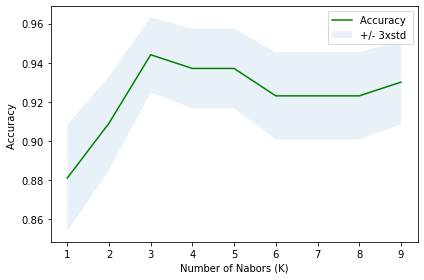

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9440559440559441 with k= 3


In [48]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
knn_pred = classifier.predict(X_test)
knn_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

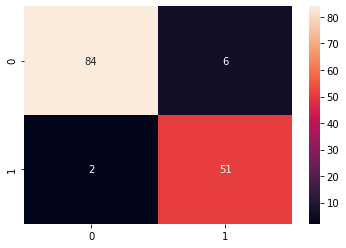

In [50]:
cm3 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm3,annot=True,fmt="d")

In [51]:
ac3 = accuracy_score(y_test,knn_pred)
print(ac3*100,"%")

94.4055944055944 %


In [52]:
accuracies3 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies3)
print(accuracies3.mean())
print(accuracies3.std())

[0.88372093 0.97674419 0.88372093 0.95348837 0.88372093 0.95348837
 0.92857143 0.92857143 0.92857143 0.95238095]
0.9272978959025471
0.03185545304159728


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


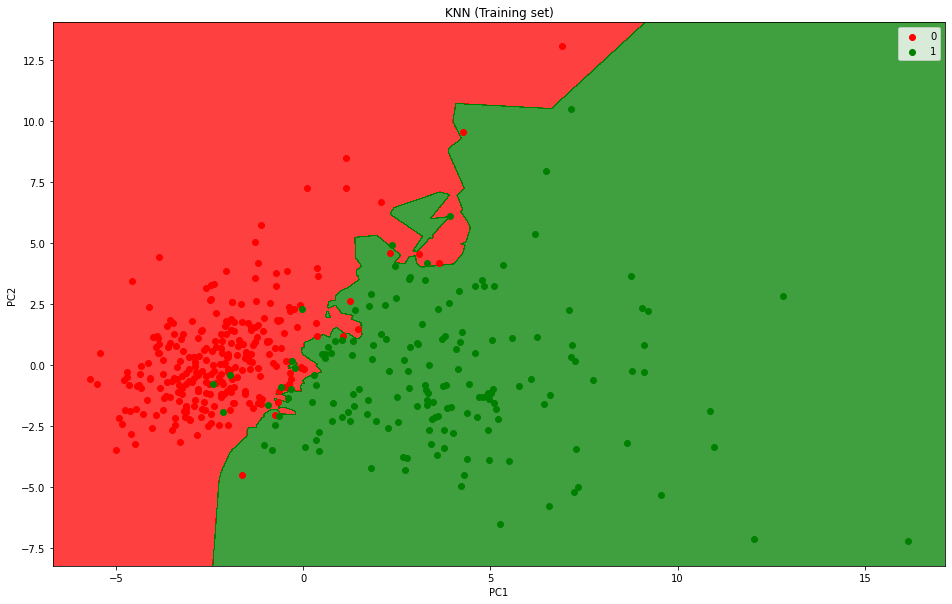

In [53]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


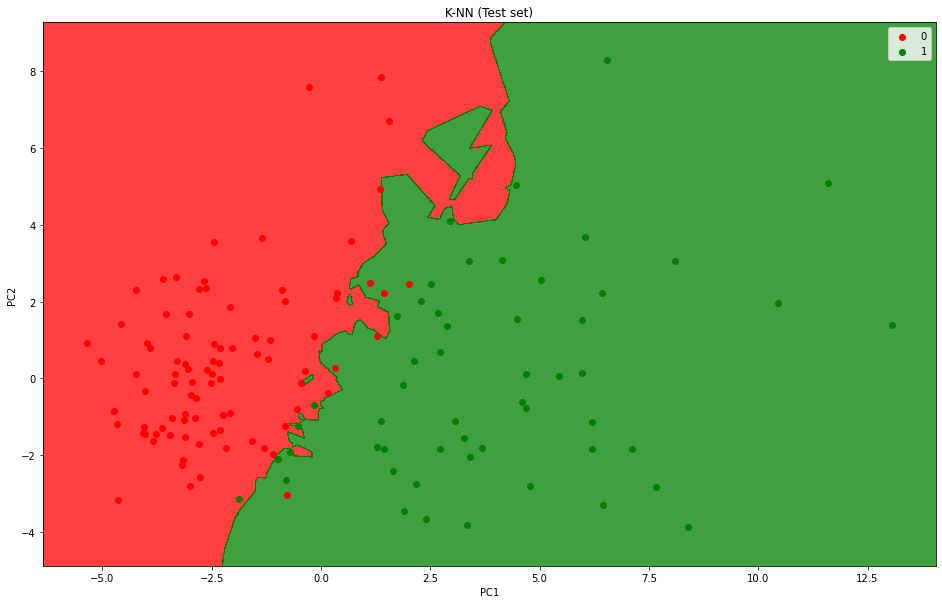

In [54]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Applying Support Vector Machine Classifier

In [55]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
svm_pred = classifier1.predict(X_test)
svm_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

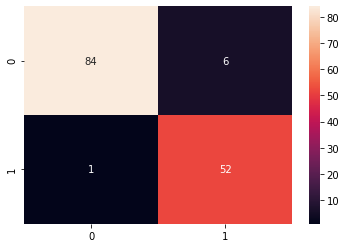

In [57]:
cm4 = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm4,annot=True,fmt="d")

In [58]:
ac4 = accuracy_score(y_test,svm_pred)
print(ac4*100,"%")

95.1048951048951 %


In [59]:
# Applying k-Fold Cross Validation
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print(accuracies1)
print(accuracies1.mean())
print(accuracies1.std())

[0.95348837 0.97674419 0.95348837 0.95348837 0.86046512 0.97674419
 0.95238095 0.97619048 0.95238095 0.97619048]
0.953156146179402
0.032813277746471


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


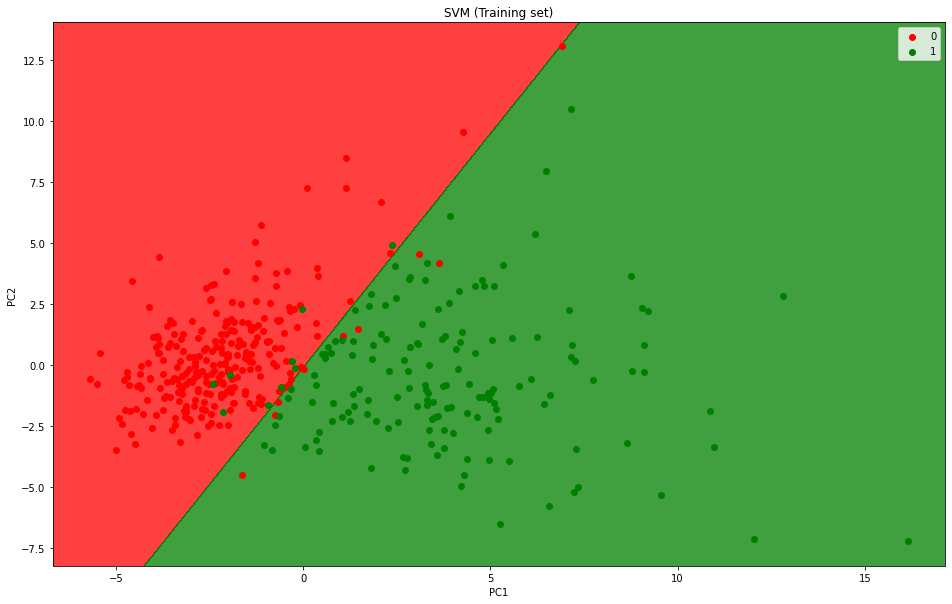

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


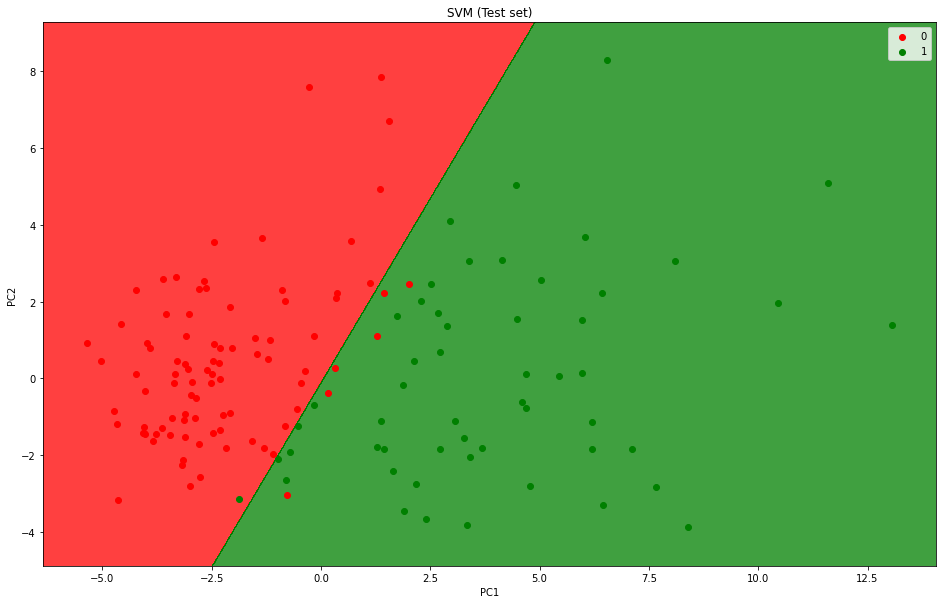

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()